# Data Set Iris- import

In [154]:

import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [155]:
# split data table into data X and class labels y

X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

$\mathbf{x^T} = \begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{pmatrix} 
= \begin{pmatrix} \text{sepal length} \\ \text{sepal width} \\\text{petal length} \\ \text{petal width} \end{pmatrix}$

$X$ is a $M\times d$ matrix where $M$ denotes the number of data and $d$ denotes the dimension of the data. In this case $M=120$ and $d=4.$ We want to show that the last two columns petal_len and petal_wid are redundant for clsutering and classification purposes. 

In [156]:
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

# Using Kernel matrix instead of Covariance Matrix

Use any kernel matrix you wish which satisfies the Mercer`s criteria to be kernel for Reproducing kernel  hilbert space (RKH). Here we compute $K(\mathbf{x}_i,\mathbf{x}_j) = \exp{-\frac{\|\mathbf{x}_i-\mathbf{x}_j\|_2^2}{s^2}}$ as kernel. In the assignment use the Semantic Diffusion Kernel.

In [157]:
import scipy
from scipy.spatial.distance import pdist, squareform
  # this is an Mxd matrix, where M is number of items and d the  dimension
s=np.var(X_train)
pairwise_dists = squareform(pdist(X_train, 'euclidean'))

K=scipy.exp(-pairwise_dists**2 / s**2)
M=len(K[:,0])


In order to centralize the Kernel we need to the following operations;
Compute the $M \times M$ matrix $J$ which is a matrix that has $1$ on the 
diagonal and $-\frac{1}{M}$ on the other positions and compute  the transpose of $J,$ i.e. $J^T.$ Then the modified Gram matrix is 
$$K_c = J*K*J^T.$$

In [158]:
s=(M,M)
I = np.zeros(s)
for i in range(M):
     for j in range(M):
            I[i][j] = 1 / M 
J = np.identity(M)-I
                    
K_c = np.dot(np.dot(J, K), J.transpose())

K_c = np.dot(np.dot(J, K), J.T)
# print(K_c)


Let us perform an SVD, to get the eigenvalue decomposition.

In [159]:
u,s,v = np.linalg.svd(K_c)
#print(u) eigenvector
#print(s) eigenvalue

Now we will reduce the dimension from 4 to 2

In [160]:
eigval=s

eig_pairs = [(np.abs(eigval[i]), u[:,i]) for i in range(len(eigval))]



matrix_w = np.hstack((eig_pairs[0][1].reshape(M,1), 
                      eig_pairs[1][1].reshape(M,1)))

#print('Matrix W:\n ,\n',W)

Now we check the norm of the eigenvectors

In [162]:
from numpy import linalg as LA
import math 
np.linalg.norm(matrix_w[:,0])

1.0000000000000009

For the projection  we compute the following, we choose the new dimension to be 2, i.e. d=2:
As a result of the svd we have the eigen values and eigen vectors in the feature space. That means  we have $$K_c W_i=\lambda_i W_i.$$
but we need the eigenvectors for $X$ not for the mapped  ones. After some calculation we can show that  the eigenvectors we need are
$$\tilde{w_i}=\frac{1}{\sqrt{\lambda_i}}.$$
Hence we need $\tilde{W}=\Lambda^{-1/2}W.$


In [163]:
import math  
size=(d,d)
Gamma = np.zeros(size)
for i in range(d):
         Gamma[i][i]=1/math.sqrt(np.abs(eigval[i]))

W=np.dot(matrix_w,Gamma)

We compute the principal components in the feature space and project the  data. 

In [164]:
Y = np.dot(K,matrix_w)


Let us plot the data by giving color to different flowers. $Y[:, 0]$ is the projection of the data to first principal component and $Y[:, 1]$ is the projection of the data to second principal component

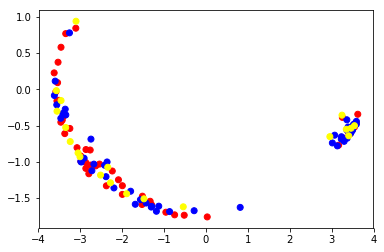

In [165]:
import matplotlib.pyplot as plt
dfcolor = pd.DataFrame([['Iris-setosa','red'],['Iris-versicolor','blue'],['Iris-virginica','yellow']],columns=['class','Color'])
mergeddf = pd.merge(df,dfcolor,on='class')
plt.scatter(Y[:, 0], Y[:, 1], c=mergeddf['Color'])

plt.show()